<a href="https://colab.research.google.com/github/cufezhusy/mlXVA/blob/master/notebooks/trainer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install cdxbasics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
! git clone https://github.com/hansbuehler/deephedging

Cloning into 'deephedging'...
remote: Enumerating objects: 148, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 148 (delta 83), reused 65 (delta 26), pack-reused 0
Receiving objects: 100% (148/148), 2.39 MiB | 6.57 MiB/s, done.
Resolving deltas: 100% (83/83), done.


Deep Hedging AI says hello  ... Tensorflow version 2.9.2


## Deep Hedging in Black \& Scholes World

Deep Hedging Engine: first of 400 epochs for 10000 samples (1000 validation samples) started. Compiling graph ...       


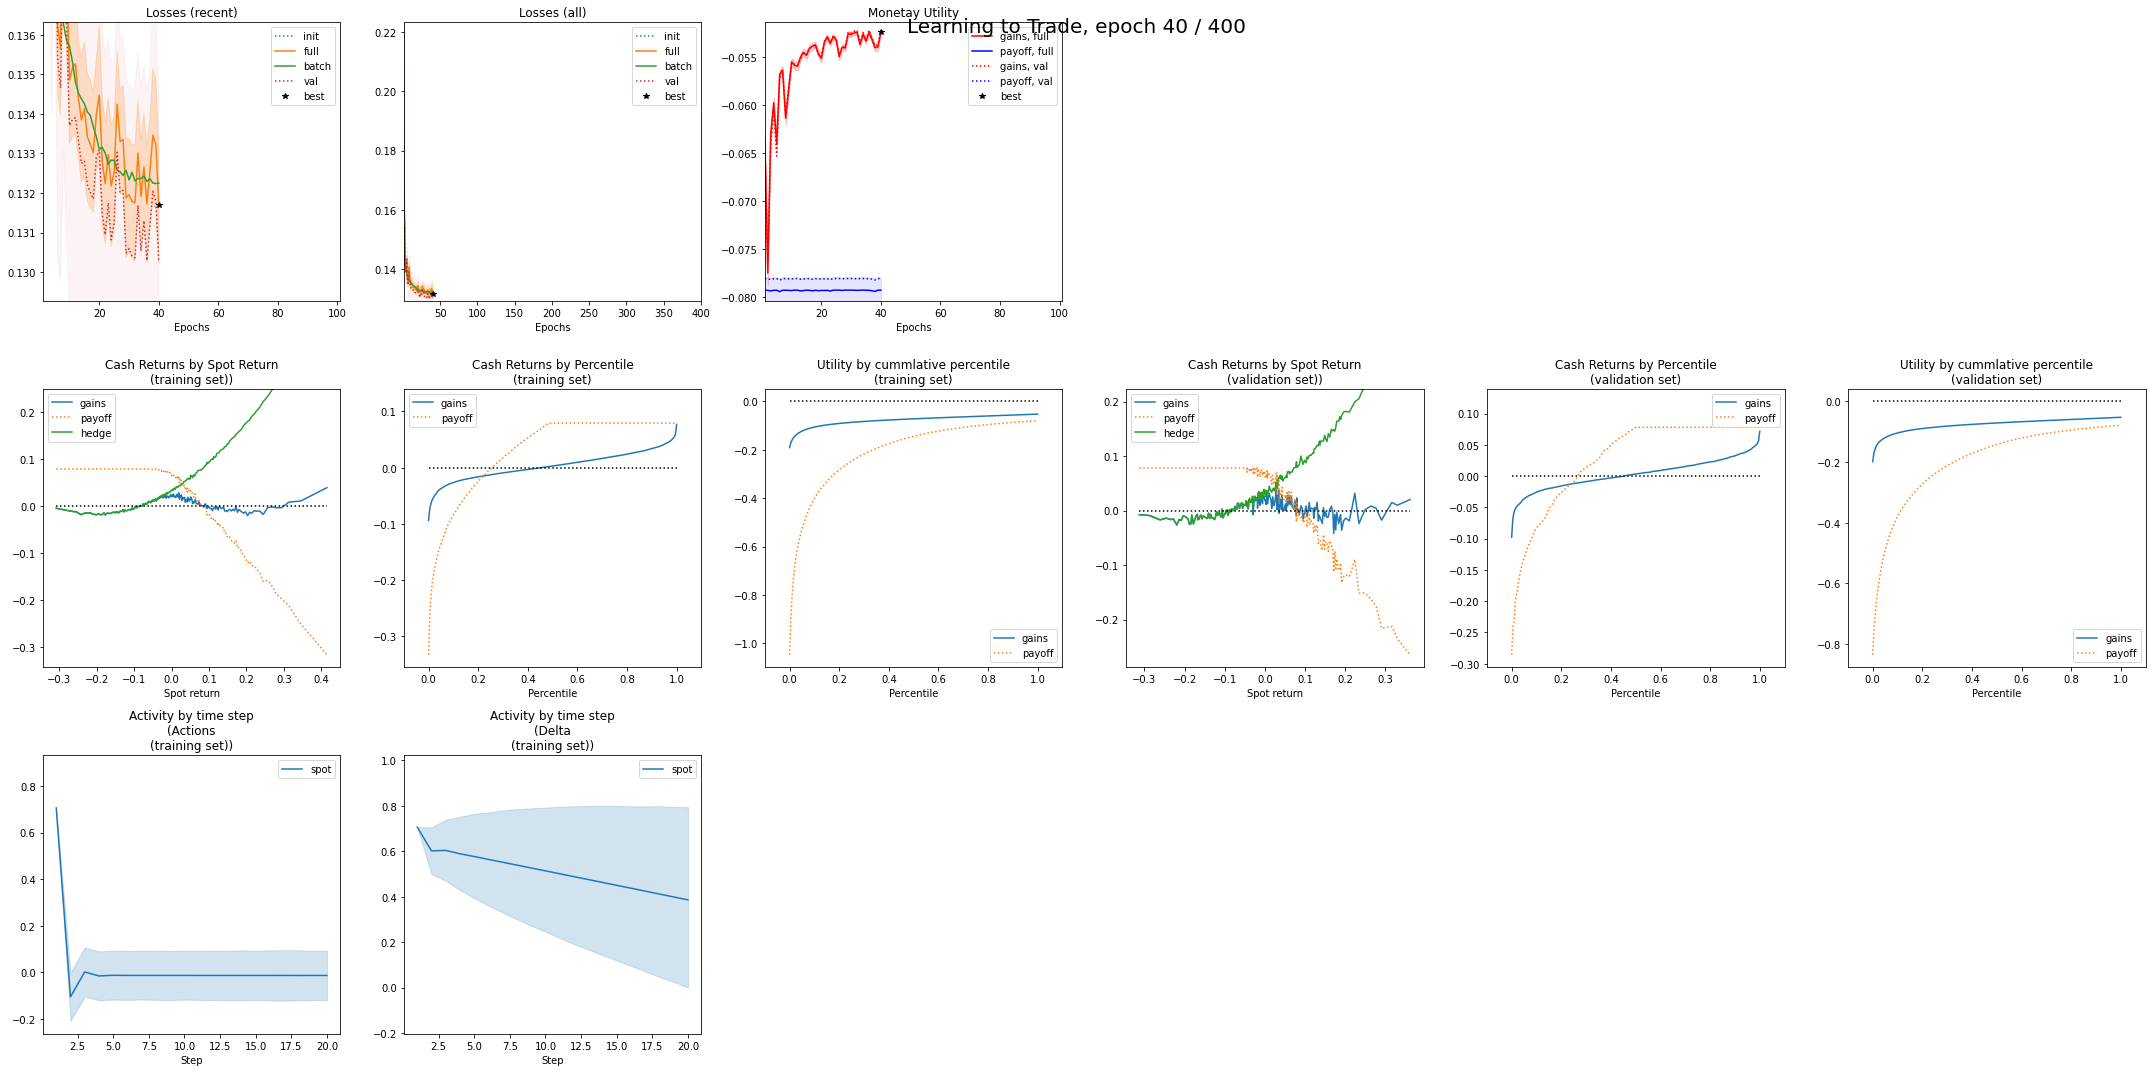

Training 40/400 epochs; 10000 samples; 1000 validation samples batch size 32 | initial loss 3.8543 (0.0910788), full 0.131684 (0.00146389), best 0.131684 (0.0910788), batch 0.132248, val 0.130269 (0.00427886). Best epoch 39 | time elapsed 4:50; estimated time remaining 43:42                         

In [ ]:
"""
When working on the code base, activate below code:

import imp
import deephedging.base as base
imp.reload(base)
import deephedging.world as world
imp.reload(world)
import deephedging.agents as agents
imp.reload(agents)
import deephedging.objectives as objectives
imp.reload(objectives)
import deephedging.gym as gym
imp.reload(gym)
import deephedging.trainer as trainer
imp.reload(trainer)
"""

print("Deep Hedging AI says hello  ... ", end='')
from cdxbasics.config import Config
from deephedging.trainer import train
from deephedging.gym import VanillaDeepHedgingGym
from deephedging.world import SimpleWorld_Spot_ATM

from IPython.display import display, Markdown

# see print of the config below for numerous options
config = Config()
# world
config.world.samples = 10000
config.world.steps = 20
config.world.black_scholes = True
# gym
config.gym.objective.utility = "exp2"
config.gym.objective.lmbda = 10.
config.gym.agent.network.depth = 3
config.gym.agent.network.activation = "softplus"
# trainer
config.trainer.train.batch_size = None
config.trainer.train.epochs = 400
config.trainer.train.run_eagerly = False
config.trainer.visual.epoch_refresh = 1
config.trainer.visual.time_refresh = 10
config.trainer.visual.confidence_pcnt_lo = 0.25
config.trainer.visual.confidence_pcnt_hi = 0.75

display(Markdown("## Deep Hedging in Black \& Scholes World"))

# create world
world  = SimpleWorld_Spot_ATM( config.world )
val_world  = world.clone(samples=1000)

# create training environment
gym = VanillaDeepHedgingGym( config.gym )

# create training environment
train( gym=gym, world=world, val_world=val_world, config=config.trainer )
r = gym(world.tf_data)
print("Keys of the dictionary returned by the gym: ", r.keys())

print("=========================================")
print("Config usage report")
print("=========================================")
print( config.usage_report() )
config.done()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 224 kB/s 


# Deep Hedging AI
### Vanilla Deep Hedging engine reference implementation with dynamic training update.
Hans Buehler, June 30 2022


## Deep Hedging in simple Stochastic Volatility

Deep Hedging Engine: first of 400 epochs for 10000 samples / 1000 validation samples started ... 

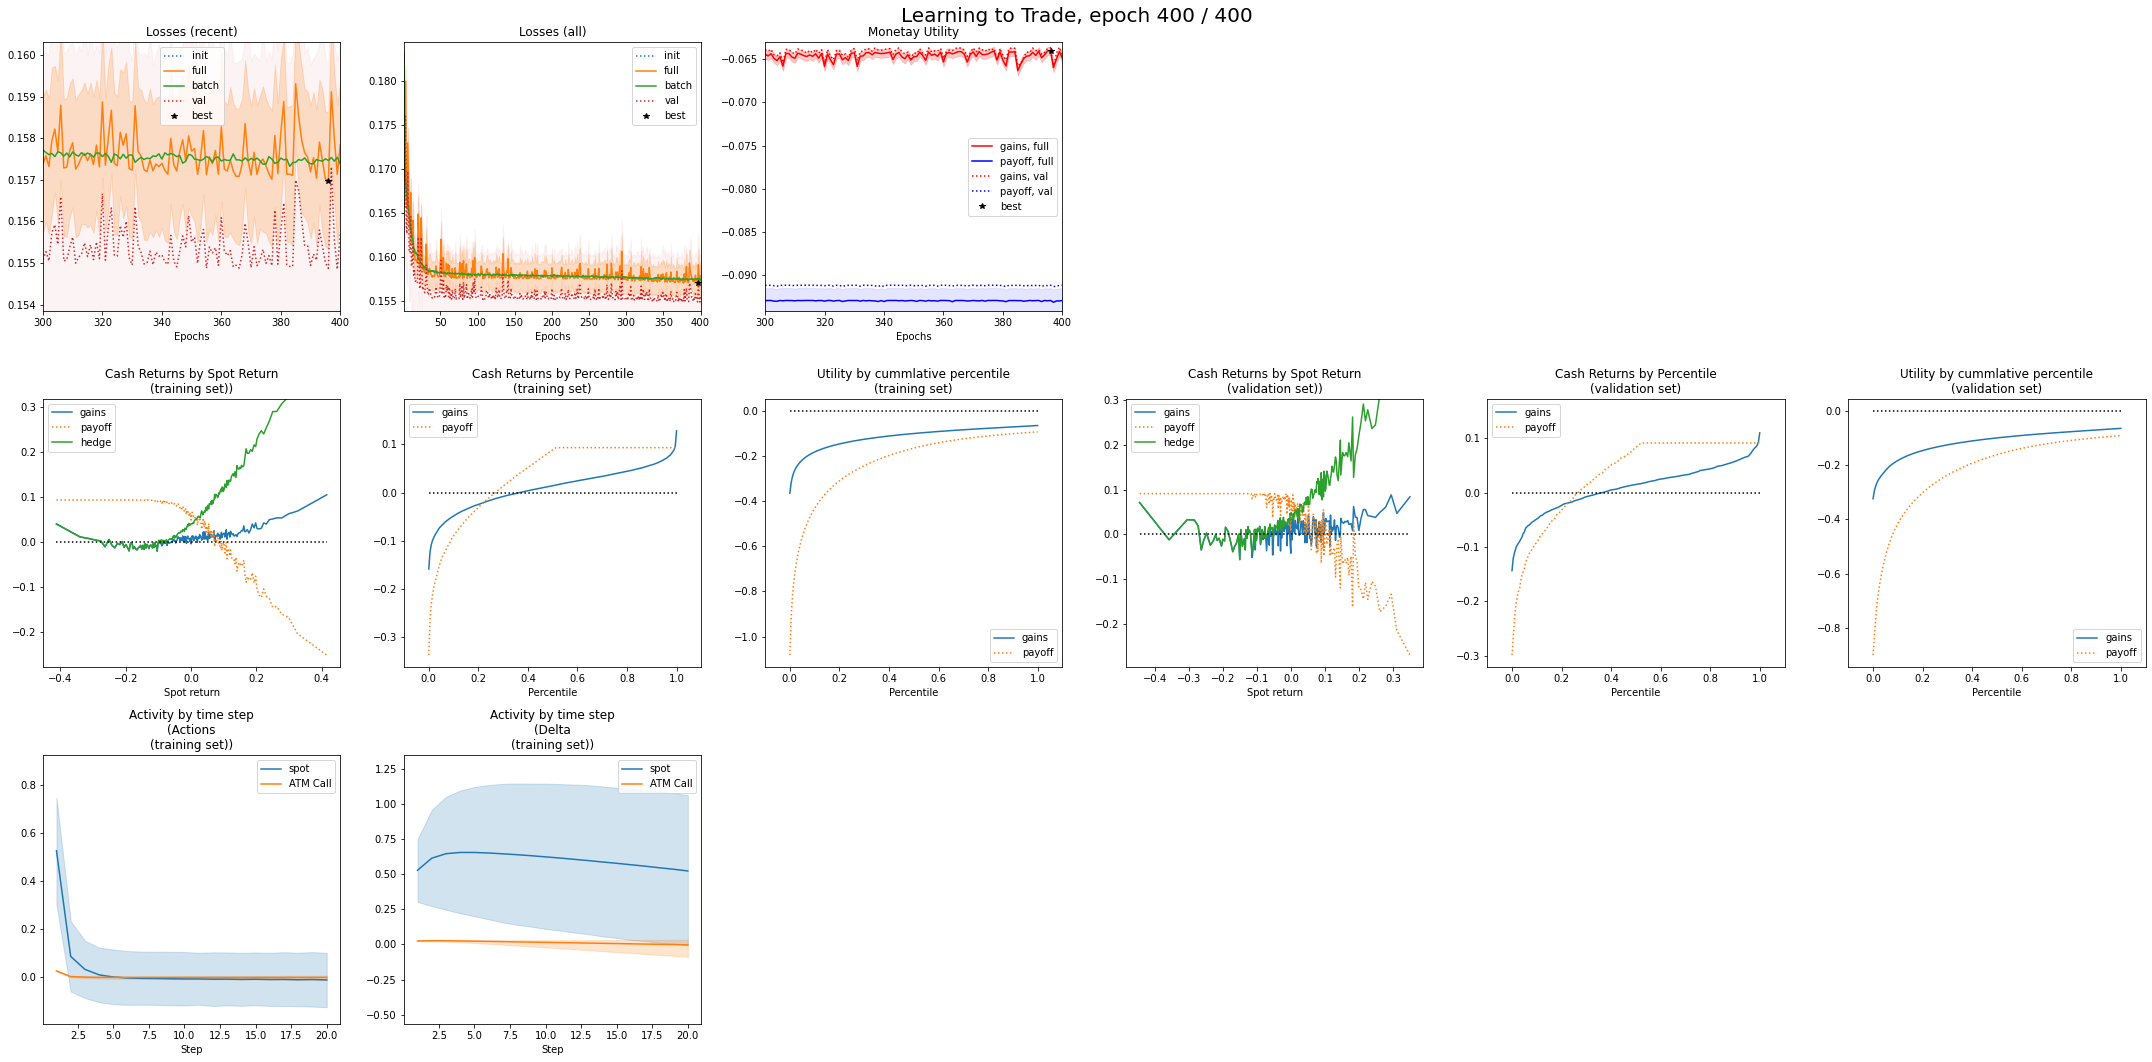

Training 400/400 epochs; 10000 samples; 1000 validation samples batch size 32 | initial loss 0.87096 (0.0188945), full 0.157852 (0.00155108), best 0.156984 (0.0188945), batch 0.157384, val 0.155694 (0.00465862). Best batch 395 | time elapsed 41:46; estimated time remaining 6s     
 Status: Ran all 400 epochs

Keys of the dictionary returned by the gym:  odict_keys(['loss', 'utility', 'utility0', 'gains', 'payoff', 'pnl', 'cost', 'actions', 'deltas'])
Config usage report
config.gym.agent.network['activation'] = softplus # Network activation function; default: relu
config.gym.agent.network['depth'] = 3 # Network depth; default: 3
config.gym.agent.network['width'] = 20 # Network width; default: 20
config.gym.agent['agent_type'] = feed_forward #  Default: feed_forward
config.gym.agent['features'] = ['price', 'delta', 'time_left'] # Named features the agent uses from the environment; default: ['price', 'delta', 'time_left']
config.gym.environment['softclip_hinge_softness'] = 1.0 # Specifies

In [ ]:
# see print of the config below for numerous options
config = Config()
# world
config.world.samples = 10000
config.world.steps = 20
config.world.black_scholes = False
# gym
config.gym.objective.utility = "exp2"
config.gym.objective.lmbda = 10.
config.gym.agent.network.depth = 3
config.gym.agent.network.activation = "softplus"
# trainer
config.trainer.train.batch_size = None
config.trainer.train.epochs = 400
config.trainer.train.run_eagerly = False
config.trainer.visual.epoch_refresh = 1
config.trainer.visual.time_refresh = 10
config.trainer.visual.confidence_pcnt_lo = 0.25
config.trainer.visual.confidence_pcnt_hi = 0.75

display(Markdown("## Deep Hedging in simple Stochastic Volatility"))

# create world
world  = SimpleWorld_Spot_ATM( config.world )
val_world  = world.clone(samples=1000)

# create training environment
gym = VanillaDeepHedgingGym( config.gym )

# create training environment
train( gym=gym, world=world, val_world=val_world, config=config.trainer )
r = gym(world.tf_data)
print("Keys of the dictionary returned by the gym: ", r.keys())

print("=========================================")
print("Config usage report")
print("=========================================")
print( config.usage_report() )
config.done()
